In [0]:
from pyspark.sql.functions import sum, avg, max, min

# File location and type
file_location =  "/FileStore/tables/PS_20174392719_1491204439457_log.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","


from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Análise de Transações").getOrCreate()

df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load( "/FileStore/tables/PS_20174392719_1491204439457_log.csv")

df.createOrReplaceTempView("transactions")

In [0]:
df.printSchema()
df.show(5)

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- nameDest: string (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)

+----+--------+--------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|  amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+--------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT| 9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PA

In [0]:
# 1. Frequência por tipo de transação
# spark.sql("""
# SELECT type, COUNT(*) AS total_transacoes
# FROM transactions
# GROUP BY type
# ORDER BY total_transacoes DESC
# """).show()

# 1. Frequência por tipo de transação
df_tipo = spark.sql("""
SELECT type, COUNT(*) AS total_transacoes
FROM transactions
GROUP BY type
ORDER BY total_transacoes DESC
""")
display(df_tipo)


type,total_transacoes
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [0]:
# 2. Valor médio por tipo de transação
# spark.sql("""
# SELECT type, ROUND(AVG(amount), 2) AS valor_medio
# FROM transactions
# GROUP BY type
# ORDER BY valor_medio DESC
# """).show()

# 2. Valor médio por tipo de transação
df_valor_medio = spark.sql("""
SELECT type, ROUND(AVG(amount), 2) AS valor_medio
FROM transactions
GROUP BY type
ORDER BY valor_medio DESC
""")
display(df_valor_medio)

type,valor_medio
TRANSFER,910647.01
CASH_OUT,176273.96
CASH_IN,168920.24
PAYMENT,13057.6
DEBIT,5483.67


In [0]:
# 3. Transações fraudulentas por tipo
# spark.sql("""
# SELECT type, COUNT(*) AS total_fraudes
# FROM transactions
# WHERE isFraud = 1
# GROUP BY type
# ORDER BY total_fraudes DESC
# """).show()

# 3. Transações fraudulentas por tipo
df_fraudes_tipo = spark.sql("""
SELECT type, COUNT(*) AS total_fraudes
FROM transactions
WHERE isFraud = 1
GROUP BY type
ORDER BY total_fraudes DESC
""")
display(df_fraudes_tipo)

type,total_fraudes
CASH_OUT,4116
TRANSFER,4097


In [0]:
# 4. Top clientes com mais transações
# spark.sql("""
# SELECT nameOrig, COUNT(*) AS transacoes
# FROM transactions
# GROUP BY nameOrig
# ORDER BY transacoes DESC
# LIMIT 10
# """).show()

# 4. Top clientes com mais transações
df_top_clientes = spark.sql("""
SELECT nameOrig, COUNT(*) AS transacoes
FROM transactions
GROUP BY nameOrig
ORDER BY transacoes DESC
LIMIT 10
""")
display(df_top_clientes)

nameOrig,transacoes
C1784010646,3
C1902386530,3
C400299098,3
C1976208114,3
C1677795071,3
C1832548028,3
C1462946854,3
C2098525306,3
C545315117,3
C1530544995,3


In [0]:
# 5. Evolução das fraudes ao longo do tempo
# spark.sql("""
# SELECT step, COUNT(*) AS fraudes
# FROM transactions
# WHERE isFraud = 1
# GROUP BY step
# ORDER BY step
# """).show()

df_fraudes_tempo = spark.sql("""
SELECT step, COUNT(*) AS fraudes
FROM transactions
WHERE isFraud = 1
GROUP BY step
ORDER BY step
""")
display(df_fraudes_tempo)

step,fraudes
1,16
2,8
3,4
4,10
5,6
6,22
7,12
8,12
9,19
10,11


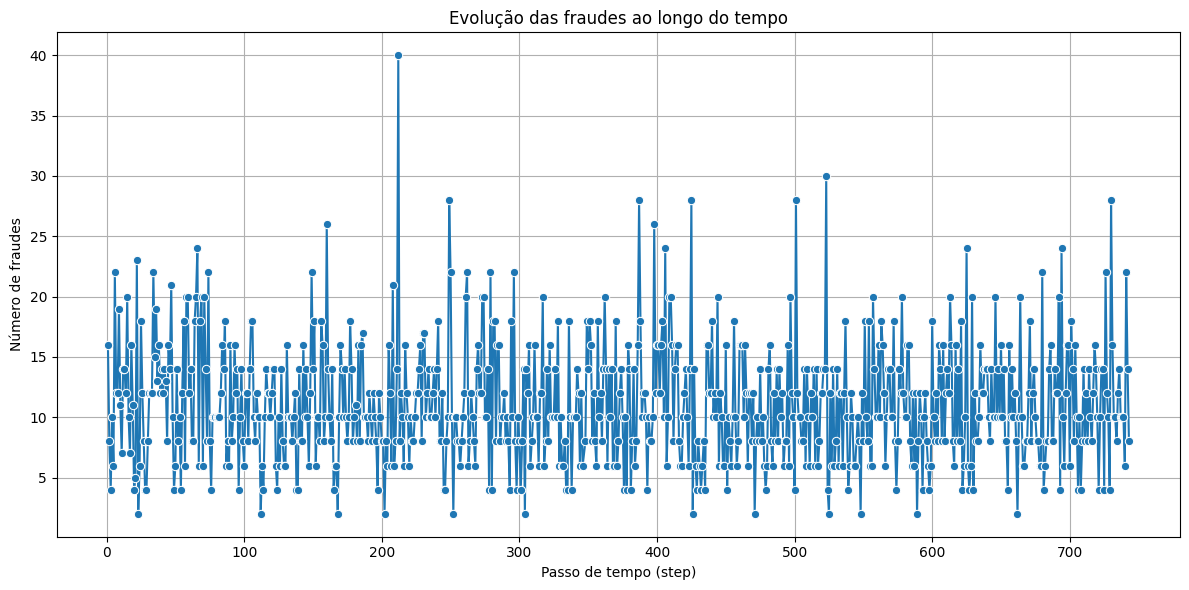

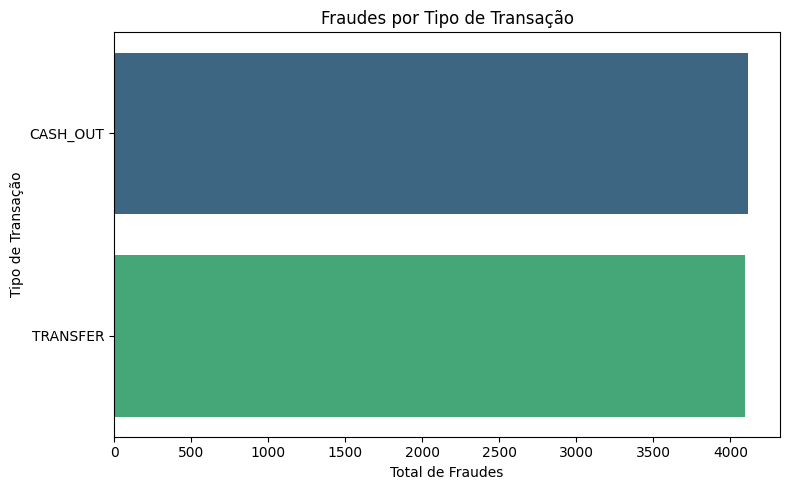

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Frequência por tipo de transação
df_tipo = spark.sql("""
SELECT type, COUNT(*) AS total_transacoes
FROM transactions
GROUP BY type
ORDER BY total_transacoes DESC
""")
df_tipo_pd = df_tipo.toPandas()

# 2. Valor médio por tipo de transação
df_valor_medio = spark.sql("""
SELECT type, ROUND(AVG(amount), 2) AS valor_medio
FROM transactions
GROUP BY type
ORDER BY valor_medio DESC
""")

# 3. Transações fraudulentas por tipo
df_fraudes_tipo = spark.sql("""
SELECT type, COUNT(*) AS total_fraudes
FROM transactions
WHERE isFraud = 1
GROUP BY type
ORDER BY total_fraudes DESC
""")
df_fraudes_tipo_pd = df_fraudes_tipo.toPandas()

# 4. Top clientes com mais transações
df_top_clientes = spark.sql("""
SELECT nameOrig, COUNT(*) AS transacoes
FROM transactions
GROUP BY nameOrig
ORDER BY transacoes DESC
LIMIT 10
""")

# 5. Evolução das fraudes ao longo do tempo
df_fraudes_tempo = spark.sql("""
SELECT step, COUNT(*) AS fraudes
FROM transactions
WHERE isFraud = 1
GROUP BY step
ORDER BY step
""")
df_fraudes_tempo_pd = df_fraudes_tempo.toPandas()

# Gráfico de fraudes ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_fraudes_tempo_pd, x="step", y="fraudes", marker="o")
plt.title("Evolução das fraudes ao longo do tempo")
plt.xlabel("Passo de tempo (step)")
plt.ylabel("Número de fraudes")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de fraudes por tipo de transação
plt.figure(figsize=(8, 5))
sns.barplot(data=df_fraudes_tipo_pd, x="total_fraudes", y="type", palette="viridis")
plt.title("Fraudes por Tipo de Transação")
plt.xlabel("Total de Fraudes")
plt.ylabel("Tipo de Transação")
plt.tight_layout()
plt.show()

In [0]:
# --- REGRESSÃO LINEAR PARA PREVER SALDO FINAL (newbalanceOrig) ---

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Seleciona colunas relevantes
data = df.select("oldbalanceOrg", "amount", "newbalanceOrig").dropna()

# Prepara os dados para ML
vec_assembler = VectorAssembler(inputCols=["oldbalanceOrg", "amount"], outputCol="features")
data_ml = vec_assembler.transform(data).select("features", "newbalanceOrig")

# Treina o modelo de regressão linear
lr = LinearRegression(featuresCol="features", labelCol="newbalanceOrig")
lr_model = lr.fit(data_ml)

# Resultados do modelo
print("Coeficientes:", lr_model.coefficients)
print("Intercepto:", lr_model.intercept)
print("R²:", lr_model.summary.r2)
print("Erro Médio Quadrático (RMSE):", lr_model.summary.rootMeanSquaredError)


Coeficientes: [1.0111707514527803,-0.02470431056913357]
Intercepto: 16358.827932638098
R²: 0.9976329878525427
Erro Médio Quadrático (RMSE): 142260.64763890885


In [0]:
# Previsão com valores reais x previstos
predictions = lr_model.transform(data_ml).select("newbalanceOrig", "prediction")
predictions_pd = predictions.toPandas()

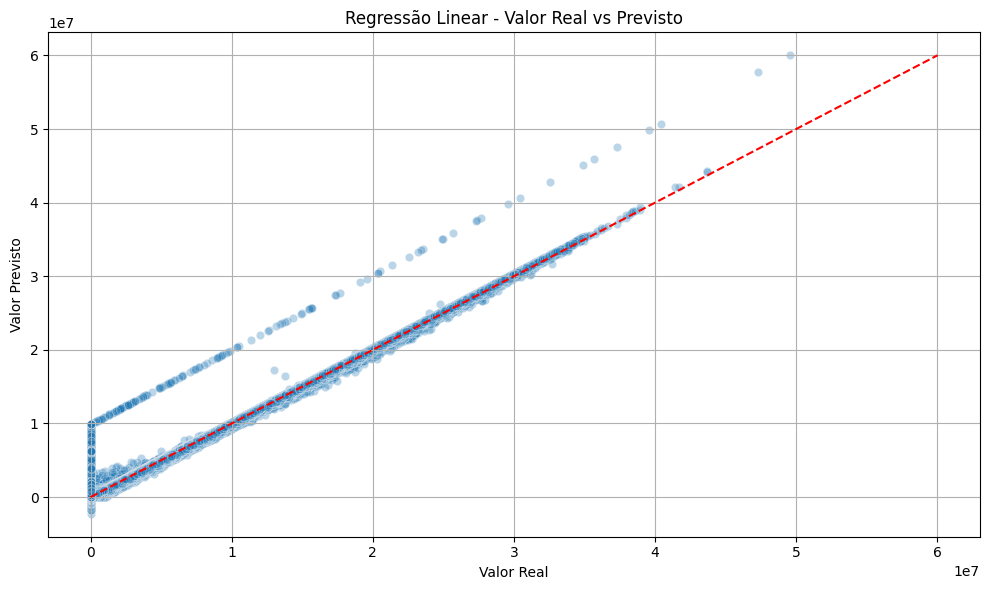

In [0]:
# Gráfico: valores reais vs previstos
plt.figure(figsize=(10, 6))
sns.scatterplot(x="newbalanceOrig", y="prediction", data=predictions_pd, alpha=0.3)
plt.plot([0, predictions_pd.max().max()], [0, predictions_pd.max().max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Regressão Linear - Valor Real vs Previsto")
plt.tight_layout()
plt.grid(True)
plt.show()


In [0]:
# --- REGRESSÃO LOGÍSTICA PARA DETECÇÃO DE FRAUDE ---

from pyspark.ml.classification import LogisticRegression

# Seleciona colunas e remove nulos
data_clf = df.select("amount", "oldbalanceOrg", "newbalanceOrig", "isFraud").dropna()

# Prepara os dados para classificação
vec_assembler_clf = VectorAssembler(inputCols=["amount", "oldbalanceOrg", "newbalanceOrig"], outputCol="features")
data_clf_ml = vec_assembler_clf.transform(data_clf).select("features", "isFraud")

# Treina o modelo de regressão logística
log_reg = LogisticRegression(featuresCol="features", labelCol="isFraud")
log_model = log_reg.fit(data_clf_ml)

# Avaliação
training_summary = log_model.summary
print("Acurácia:", training_summary.accuracy)
print("Precisão:", training_summary.precisionByLabel)
print("Recall:", training_summary.recallByLabel)
print("F1 Score:", training_summary.fMeasureByLabel())

Acurácia: 0.9991676384885472
Precisão: [0.9992490557367345, 0.8684011113917656]
Recall: [0.9999180096584938, 0.4186046511627907]
F1 Score: [0.9995834207761651, 0.5649030561945448]


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, monotonically_increasing_id, row_number, dense_rank
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns


# =====================================
# CRIAÇÃO DO MODELO EM ESQUEMA ESTRELA
# =====================================

# Dimensão Tipo de Transação
window_tipo = Window.orderBy("type")
dim_tipo = df.select("type").distinct().withColumn("tipo_id", row_number().over(window_tipo))
dim_tipo = dim_tipo.select("tipo_id", "type")


In [0]:
# Dimensão Cliente (Origem)
window_cli = Window.orderBy("nameOrig")
dim_cliente = df.select("nameOrig").distinct().withColumn("cliente_id", row_number().over(window_cli))
dim_cliente = dim_cliente.select("cliente_id", col("nameOrig").alias("nome_cliente"))

In [0]:
# Dimensão Destinatário
window_dest = Window.orderBy("nameDest")
dim_dest = df.select("nameDest").distinct().withColumn("destinatario_id", row_number().over(window_dest))
dim_dest = dim_dest.select("destinatario_id", col("nameDest").alias("nome_destinatario"))

In [0]:
# Dimensão Tempo (apenas com step neste caso)
dim_tempo = df.select("step").distinct().orderBy("step")

In [0]:
# Junta com as dimensões para criar a Tabela Fato
fato = df \
    .join(dim_tipo, on="type", how="left") \
    .join(dim_cliente, df.nameOrig == dim_cliente.nome_cliente, "left") \
    .join(dim_dest, df.nameDest == dim_dest.nome_destinatario, "left") \
    .select(
        monotonically_increasing_id().alias("transacao_id"),
        "step",
        "tipo_id",
        "cliente_id",
        "destinatario_id",
        "amount",
        col("oldbalanceOrg").alias("saldo_anterior"),
        col("newbalanceOrig").alias("saldo_posterior"),
        col("isFraud").alias("fraude"),
        col("isFlaggedFraud").alias("alerta_fraude")
    )

In [0]:
# Salva as tabelas em formato Delta
fato.write.format("delta").mode("overwrite").save("/mnt/paysim/fato_transacoes")
dim_tipo.write.format("delta").mode("overwrite").save("/mnt/paysim/dim_tipo")
dim_cliente.write.format("delta").mode("overwrite").save("/mnt/paysim/dim_cliente")
dim_dest.write.format("delta").mode("overwrite").save("/mnt/paysim/dim_destinatario")
dim_tempo.write.format("delta").mode("overwrite").save("/mnt/paysim/dim_tempo")

print("Modelo em Esquema Estrela criado e salvo!")

Modelo em Esquema Estrela criado e salvo!


In [0]:
%sql
-- Crie catálogos se necessário
CREATE DATABASE IF NOT EXISTS paysim;

-- Registre as tabelas no metastore
CREATE TABLE IF NOT EXISTS paysim.fato_transacoes
USING DELTA
LOCATION '/mnt/paysim/fato_transacoes';

CREATE TABLE IF NOT EXISTS paysim.dim_tipo
USING DELTA
LOCATION '/mnt/paysim/dim_tipo';

CREATE TABLE IF NOT EXISTS paysim.dim_cliente
USING DELTA
LOCATION '/mnt/paysim/dim_cliente';

CREATE TABLE IF NOT EXISTS paysim.dim_destinatario
USING DELTA
LOCATION '/mnt/paysim/dim_destinatario';

CREATE TABLE IF NOT EXISTS paysim.dim_tempo
USING DELTA
LOCATION '/mnt/paysim/dim_tempo';

In [0]:
%sql
SELECT
  dc.nome_cliente,
  COUNT(*) AS total_fraudes
FROM paysim.fato_transacoes ft
JOIN paysim.dim_cliente dc ON ft.cliente_id = dc.cliente_id
WHERE ft.fraude = 1
GROUP BY dc.nome_cliente
ORDER BY total_fraudes DESC
LIMIT 10;

nome_cliente,total_fraudes
C1055929140,1
C1061805919,1
C1074619527,1
C1259321993,1
C1276671609,1
C1313615833,1
C1339851120,1
C1376413283,1
C1409640196,1
C1415552520,1


In [0]:
%sql
SELECT
  fraude,
  COUNT(*) AS total_transacoes,
  AVG(amount) AS media_valor,
  MAX(amount) AS maior_valor,
  MIN(amount) AS menor_valor
FROM paysim.fato_transacoes
GROUP BY fraude;

fraude,total_transacoes,media_valor,maior_valor,menor_valor
1,8213,1467967.299140387,1.0E7,0.0
0,6354407,178197.0417274021,9.244551664E7,0.01


In [0]:
%sql
SELECT
  step,
  SUM(fraude) AS total_fraudes
FROM paysim.fato_transacoes
GROUP BY step
ORDER BY step;

step,total_fraudes
1,16
2,8
3,4
4,10
5,6
6,22
7,12
8,12
9,19
10,11


In [0]:
%sql
SELECT
  dc.nome_cliente,
  COUNT(*) AS total_transacoes,
  SUM(ft.amount) AS total_valor
FROM paysim.fato_transacoes ft
JOIN paysim.dim_cliente dc ON ft.cliente_id = dc.cliente_id
GROUP BY dc.nome_cliente
ORDER BY total_valor DESC
LIMIT 10;

nome_cliente,total_transacoes,total_valor
C1715283297,1,9.244551664E7
C2127282686,1,7.382349036E7
C2044643633,1,7.117248042E7
C1425667947,1,6.98867313E7
C1584456031,1,6.933731627E7
C811810230,1,6.750076129E7
C420748282,1,6.676127221E7
C1139847449,1,6.423444819E7
C300140823,1,6.384799258E7
C372535854,1,6.329483963E7


In [0]:
%sql
SELECT
  dt.type AS tipo_transacao,
  SUM(ft.alerta_fraude) AS alertas,
  SUM(ft.fraude) AS fraudes
FROM paysim.fato_transacoes ft
JOIN paysim.dim_tipo dt ON ft.tipo_id = dt.tipo_id
GROUP BY dt.type;

tipo_transacao,alertas,fraudes
TRANSFER,16,4097
CASH_IN,0,0
CASH_OUT,0,4116
PAYMENT,0,0
DEBIT,0,0


In [0]:
# Fato
fato.printSchema()

# Dimensões
dim_tipo.printSchema()
dim_cliente.printSchema()
dim_dest.printSchema()
dim_tempo.printSchema()

root
 |-- transacao_id: long (nullable = false)
 |-- step: integer (nullable = true)
 |-- tipo_id: integer (nullable = true)
 |-- cliente_id: integer (nullable = true)
 |-- destinatario_id: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- saldo_anterior: double (nullable = true)
 |-- saldo_posterior: double (nullable = true)
 |-- fraude: integer (nullable = true)
 |-- alerta_fraude: integer (nullable = true)

root
 |-- tipo_id: integer (nullable = false)
 |-- type: string (nullable = true)

root
 |-- cliente_id: integer (nullable = false)
 |-- nome_cliente: string (nullable = true)

root
 |-- destinatario_id: integer (nullable = false)
 |-- nome_destinatario: string (nullable = true)

root
 |-- step: integer (nullable = true)



In [0]:
dir()

['In',
 'LinearRegression',
 'LogisticRegression',
 'Out',
 'SparkSession',
 'VectorAssembler',
 'Window',
 '_',
 '_19',
 '_20',
 '_21',
 '_22',
 '_23',
 '_24',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__name__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sqldf',
 'avg',
 'col',
 'data',
 'data_clf',
 'data_clf_ml',
 'data_ml',
 'dbutils',
 'delimiter',
 'dense_rank',
 'df',
 'df_fraudes_tempo',
 'df_fraudes_tempo_pd',
 'df_fraudes_tipo',
 'df_fraudes_tipo_pd',
 'df_tipo',
 'df_tipo_pd',
 'df_top_clientes',
 'df_valor_medio',
 'dim_cliente',
 'dim_dest',
 'dim_tempo',
 'dim_tipo',
 'display',
 'displayHTML',
 'exit',
 'fato',
 'file_location',
 'file_type',
 'first_row_is_header',
 'getArgument',
 'get_ipython',
 'infer_schema',
 'log_model',
 'log

In [0]:
# from pyspark.sql.functions import col, min, max, countDistinct, count, isnan, when
# from pyspark.sql import DataFrame

# def gerar_catalogo(df: DataFrame, nome_tabela: str) -> DataFrame:
#     dados = []

#     for col_name, dtype in df.dtypes:
#         coluna = df.select(col(col_name))
#         unicos = coluna.distinct().count()
#         nulos = coluna.filter((col(col_name).isNull()) | (isnan(col(col_name)))).count()

#         if dtype in ['int', 'bigint', 'double', 'float']:
#             stats = df.select(min(col(col_name)).alias("min"), max(col(col_name)).alias("max")).first()
#             minimo = stats["min"]
#             maximo = stats["max"]
#         else:
#             minimo = None
#             maximo = None

#         dados.append((nome_tabela, col_name, dtype, unicos, minimo, maximo, nulos))

#     schema = ["tabela", "coluna", "tipo_dado", "valores_unicos", "valor_minimo", "valor_maximo", "valores_nulos"]
#     return spark.createDataFrame(dados, schema)

from pyspark.sql.functions import col, min, max, countDistinct, count, isnan, when, lit
from pyspark.sql import DataFrame
from pyspark.sql.types import StringType

def gerar_catalogo(df: DataFrame, nome_tabela: str) -> DataFrame:
    dados = []

    for col_name, dtype in df.dtypes:
        coluna = df.select(col(col_name))
        unicos = coluna.distinct().count()
        nulos = coluna.filter((col(col_name).isNull()) | (isnan(col(col_name)))).count()

        if dtype in ['int', 'bigint', 'double', 'float']:
            stats = df.select(min(col(col_name)).alias("min"), max(col(col_name)).alias("max")).first()
            minimo = str(stats["min"])
            maximo = str(stats["max"])
        else:
            minimo = None
            maximo = None

        dados.append((nome_tabela, col_name, dtype, str(unicos), minimo, maximo, str(nulos)))

    schema = ["tabela", "coluna", "tipo_dado", "valores_unicos", "valor_minimo", "valor_maximo", "valores_nulos"]
    return spark.createDataFrame(dados, schema)

In [0]:
# cat_fato = gerar_catalogo(fato, "fato_transacoes")
# cat_tipo = gerar_catalogo(dim_tipo, "dim_tipo")
# cat_cliente = gerar_catalogo(dim_cliente, "dim_cliente")
# cat_dest = gerar_catalogo(dim_destinatario, "dim_destinatario")
# cat_tempo = gerar_catalogo(dim_tempo, "dim_tempo")

# # Unir tudo em um único catálogo
# catalogo_final = cat_fato.union(cat_tipo).union(cat_cliente).union(cat_dest).union(cat_tempo)
# catalogo_final.show(truncate=False)

cat_fato = gerar_catalogo(fato, "fato_transacoes")
cat_tipo = gerar_catalogo(dim_tipo, "dim_tipo")
cat_cliente = gerar_catalogo(dim_cliente, "dim_cliente")
cat_dest = gerar_catalogo(dim_dest, "dim_destinatario")
cat_tempo = gerar_catalogo(dim_tempo, "dim_tempo")

catalogo_final = cat_fato.union(cat_tipo).union(cat_cliente).union(cat_dest).union(cat_tempo)
catalogo_final.show(truncate=False)

+----------------+-----------------+---------+--------------+------------+------------+-------------+
|tabela          |coluna           |tipo_dado|valores_unicos|valor_minimo|valor_maximo|valores_nulos|
+----------------+-----------------+---------+--------------+------------+------------+-------------+
|fato_transacoes |transacao_id     |bigint   |6362620       |0           |60130288799 |0            |
|fato_transacoes |step             |int      |743           |1           |743         |0            |
|fato_transacoes |tipo_id          |int      |5             |1           |5           |0            |
|fato_transacoes |cliente_id       |int      |6353307       |1           |6353307     |0            |
|fato_transacoes |destinatario_id  |int      |2722362       |1           |2722362     |0            |
|fato_transacoes |amount           |double   |5316900       |0.0         |92445516.64 |0            |
|fato_transacoes |saldo_anterior   |double   |1845844       |0.0         |59585040

In [0]:
from pyspark.sql.functions import col, isnan, when, count

df.select([
    count(when(col(c).isNull() | isnan(c), c)).alias(c)
    for c in df.columns
]).show()